In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import numpy as np
from scipy.fftpack import rfft, rfftfreq #fourier transformation package
import pywt

In [28]:
heated = ["25-1","25-2","25-3","250-1","250-2","250-3","500-1","500-2","500-3","750-1","750-2","750-3","1000-1","1000-2","1000-3"]
room_b = ["B-250-1","B-250-2","B-250-3","B-500-1","B-500-2","B-500-3","B-750-1","B-750-2","B-750-3","B-1000-1","B-1000-2","B-1000-3"]
room_w = ["W-250-1","W-250-2","W-250-3","W-500-1","W-500-2","W-500-3","W-750-1","W-750-2","W-750-3","W-1000-1","W-1000-2","W-1000-3"]
sat_b = ["250-1","250-2","250-3","500-1","500-2","500-3","750-1","750-2","750-3","1000-1","1000-2","1000-3"]
sat_w = ["250-1","250-2","250-3","500-1","500-2","500-3","750-1","750-2","750-3","1000-1","1000-2","1000-3"]

In [34]:
df = pd.read_csv("./CSV/Room Temp/Water/W-250-3.csv")
df.drop(df.index[0:14],0,inplace=True)
df = df.reset_index(drop=True)
df.columns = df.iloc[0]
df.drop(df.index[0:2], inplace=True)
df = df.reset_index(drop=True)
df.drop(df.columns[[1, 11, 12, 13]], axis=1, inplace=True)
df

,ID,Date & Time,Measurement Type,Velocity [m/s],Time 1 [µs],Time 2 [µs],Distance [m],Crack Depth [m],Correction Factor,Ambient Temperature [°C],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,46653,4.10.2018 3:26:25,Direct (default),2333,43.3,0,0.101,0,1,31,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,46652,4.10.2018 3:26:24,Direct (default),2338,43.2,0,0.101,0,1,31,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,46651,4.10.2018 3:26:23,Direct (default),2338,43.2,0,0.101,0,1,31,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,46650,4.10.2018 3:26:22,Direct (default),2338,43.2,0,0.101,0,1,31,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,46649,4.10.2018 3:26:21,Direct (default),2333,43.3,0,0.101,0,1,31,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,46648,4.10.2018 3:26:20,Direct (default),2354,42.9,0,0.101,0,1,31,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
6,46647,4.10.2018 3:26:19,Direct (default),2338,43.2,0,0.101,0,1,31,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
7,46646,4.10.2018 3:26:18,Direct (default),2338,43.2,0,0.101,0,1,31,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
8,46645,4.10.2018 3:26:17,Direct (default),2338,43.2,0,0.101,0,1,31,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
9,46644,4.10.2018 3:26:16,Direct (default),2327,43.4,0,0.101,0,1,31,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [10]:
w_size = (16,6) #waveform plot size
f_size = (16,8) #frequency plot size
time = np.arange(start=0, stop=199, step=0.5)

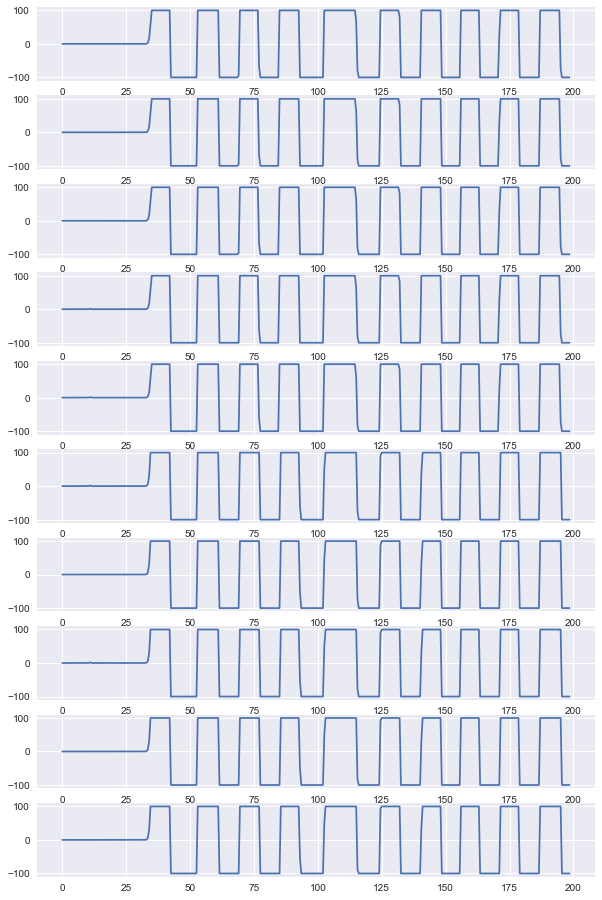

In [19]:
fig, axs = plt.subplots(10, figsize=(10,16))
for i in range(0,10):
    axs[i].plot(time, df.iloc[i, 21:].astype(float))

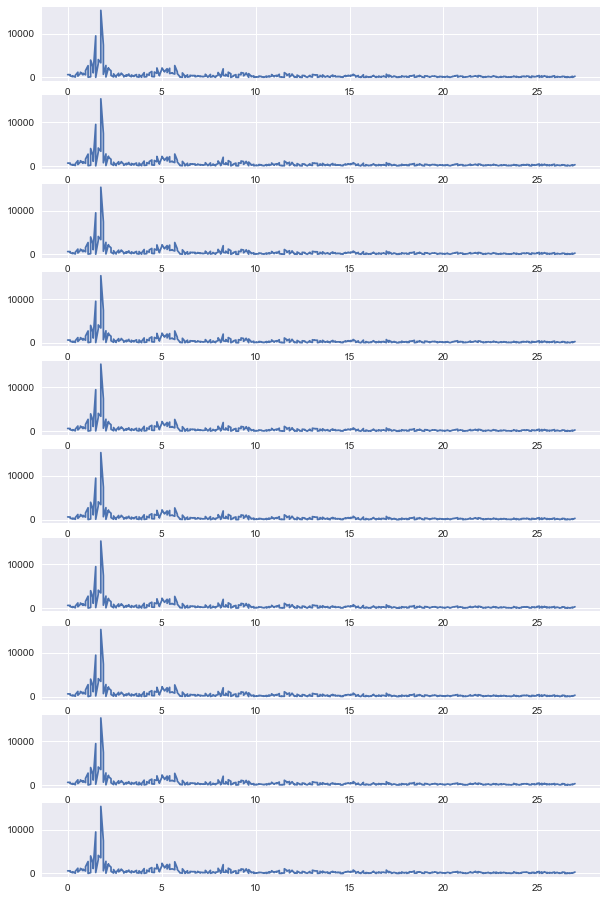

In [37]:
fig_f, axs_f = plt.subplots(10, figsize=(10,16))
for i in range(0,10):
    axs_f[i].plot(rfftfreq(len(df.iloc[i][21:]), 1/54), np.abs(rfft(df.iloc[i][21:])))